<h1><center>Car CO2 Emission Prediction (Regression)</center></h1>

<h2>About this notebook</h2>

In this notebook, I will use data about cars and regression models to predict CO2 emission. This data provides model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.
</ol>Note: This is a part of IBM Data Scientist course projects.

<h1>Table of contents</h1>
<ol>1. Variable Descriptions</ol>
        <ol>2. Understand Data</ol>
        <ol>3. Linear Regression</ol>
        <ol>4. Non-linear Regression</ol>
            <ol>4.1 Polynomial Regression</ol>
            <ol>4.2 Ridge Regression</ol>
            <ol>4.3 Model Selection</ol>
    </ol>

In [1]:
#import packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
#get data
df=pd.read_csv(r'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')

This dataset has 1,067 observations and 13 columns.

<h2>Variable Descriptions</h2>

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182

<h2> Understand Data </h2>

In [12]:
#shape of the data
df.shape

(1067, 13)

In [10]:
#the head of data
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [103]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [13]:
#see the descriptive statistics of the numeric variables
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


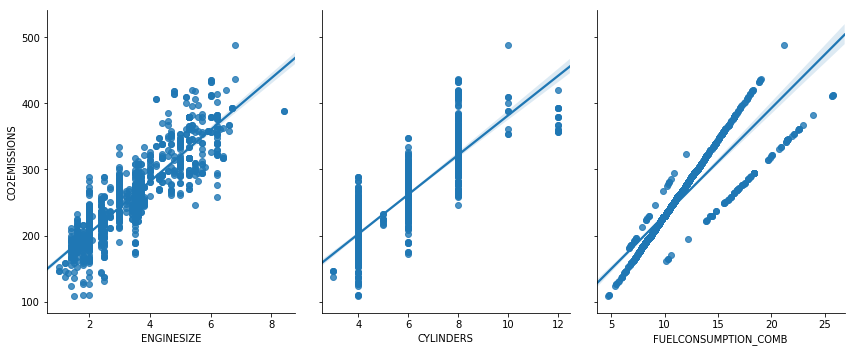

In [19]:
#Generate scatter plots for numeric variables VS CO2EMISSIONS to see if correlations
sns.pairplot(df, x_vars=["ENGINESIZE", "CYLINDERS", 'FUELCONSUMPTION_COMB'], y_vars=["CO2EMISSIONS"],
             height=5, aspect=.8, kind="reg");

CYLINDERS are categorical. There are 5 distinct values in the dataset. We want to see if there are any difference in the mean of each type of cylinder numbers realting to CO2EMISSIONS.

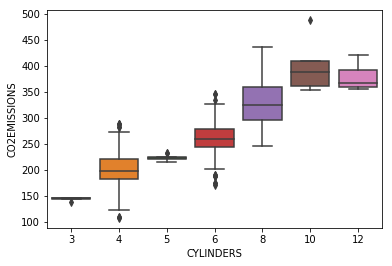

In [25]:
#box plot for CYLINERS
sns.boxplot(x="CYLINDERS", y="CO2EMISSIONS", data=df)

So, the number of cylinders has some influence in CO2EMISSIONS.

There are four columns about fuel consumptions: FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB, and FUELCONSUMPTION_COMB_MPG. If they are highly correlated, we can eliminate some of them to make the model lighter. We will run a correlation.

In [29]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


So, we can use one of the columns about fuel consumption without lossing too much information.Now we know ENGINESIZE, CYLINERS, and FUELCOMSUMPTION_COMB are useful for building the regression model.

<h1>Linear Regression</h1>

In [3]:
#create a new dataframe for model building
lrdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
lrdf.shape

(1067, 4)

In [9]:
#spilt train and test data
msk = np.random.rand(len(df)) < 0.8
train = lrdf[msk]
test = lrdf[~msk]

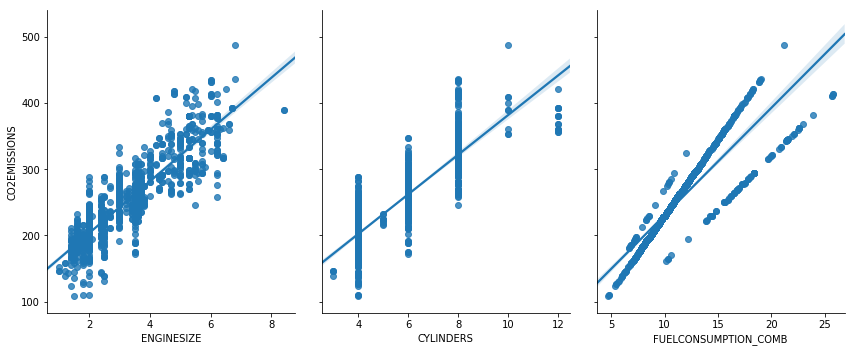

In [37]:
#train data distribution
sns.pairplot(lrdf, x_vars=['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB'], y_vars=['CO2EMISSIONS'],
             height=5, aspect=.8, kind="reg")

In [10]:
#build the model
#step 1, import packages
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

#step 2, create independent variables
X=train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
Y=train[['CO2EMISSIONS']]

In [11]:
#step 3, fit the linear regression model
lm.fit(X,Y)
# The coefficients
print ('Coefficients: ', lm.coef_)
print ('Intercept: ',lm.intercept_)

Coefficients:  [[11.51682309  7.08534953  9.46429344]]
Intercept:  [66.8749315]


Now the model equation is: 
Y = 61.92 + 11.52 * ENGINESIZE 7.09 * CYLINDERS + 9.46* FUELCONSUMPTION_COMB + Error

In [12]:
#model evaluation
from sklearn.metrics import r2_score

test_x = test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
test_y = test[['CO2EMISSIONS']]
test_y_hat = lm.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 17.90
Residual sum of squares (MSE): 622.53
R2-score: 0.83


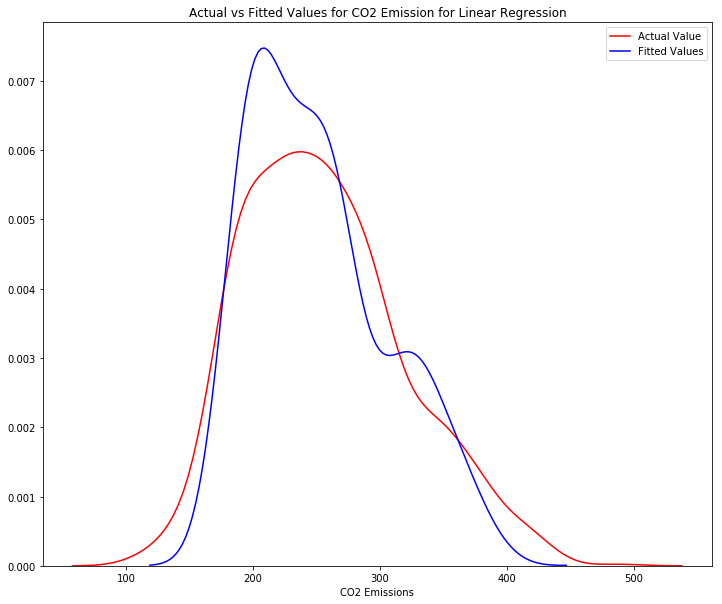

In [32]:
#Distribution Plot
width = 12
height = 10
plt.figure(figsize=(width, height))

ax1 = sns.distplot(lrdf['CO2EMISSIONS'], hist=False, color="r", label="Actual Value")
sns.distplot(test_y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for CO2 Emission for Linear Regression')
plt.xlabel('CO2 Emissions')
plt.ylabel('')

plt.show()
plt.close()

<h1>Non Linear Regression</h1>

Although the above linear model fits well (R^2 is 0.83), as seen from the distribution plot, it fails to explain some data points. This time we try non-linear regression models.

<h2>Polynomial Model</h2>

In [5]:
#import packages
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [14]:
#first, try ENGINESIZE as the only independent variable and the degree=2
train_x=train[['ENGINESIZE']]
train_y=train[['CO2EMISSIONS']]
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [15]:
train_y_ = lm.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', lm.coef_)
print ('Intercept: ',lm.intercept_)

Coefficients:  [[ 0.         51.41622857 -1.70964308]]
Intercept:  [106.21953147]


Text(0, 0.5, 'Emission')

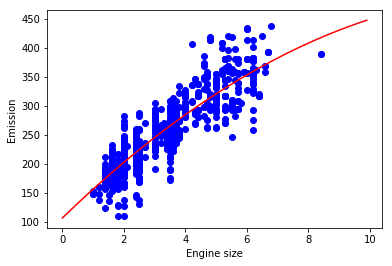

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = lm.intercept_[0]+ lm.coef_[0][1]*XX+ lm.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [17]:
#Evaluation
test_x = test[['ENGINESIZE']]
test_y = test[['CO2EMISSIONS']]
test_x_poly = poly.fit_transform(test_x)
test_y_ = lm.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 24.60
Residual sum of squares (MSE): 1104.64
R2-score: 0.62


Using polynomial regression (degree=2), the MSE is much higher than linear regression. Let's try to optimize the number of degree.

Text(0.5, 1.0, 'R^2 Using Test Data')

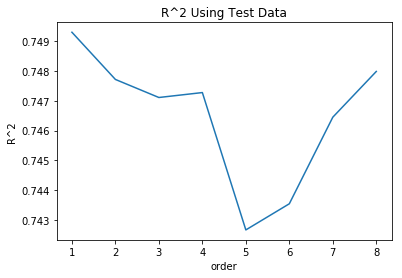

In [19]:
#Optimize the polynomial degrees
Rsqu_test = []

order = [1, 2, 3, 4, 5, 6, 7, 8]
for n in order:
    poly = PolynomialFeatures(degree=n)
    train_x=train[['ENGINESIZE']]
    train_y=train[['CO2EMISSIONS']]
    train_x_poly = poly.fit_transform(train_x)
    test_x = test[['ENGINESIZE']]
    test_y = test[['CO2EMISSIONS']]
    test_x_poly = poly.fit_transform(test_x)
 #lr=LinearRegression()  
    lm.fit(train_x_poly, train_y)
    Rsqu_test.append(lm.score(test_x_poly, test_y))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

When the polynomial degree for ENGINESIZE is 1, we have a very good R square. Then when the polynomial degree goes up, R square becomes lower. However, when the order is greater than seven, the R square is also pretty well. Let's explore whether it's necessary to have such high degree.

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


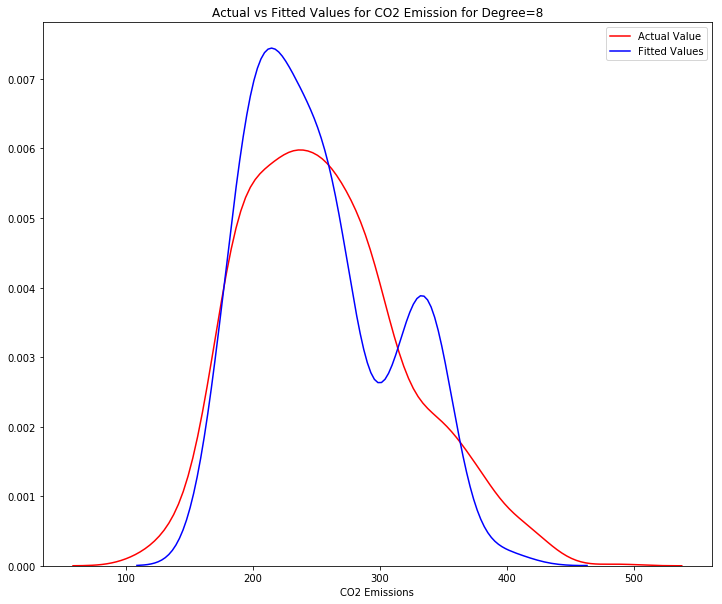

In [29]:
#degree equals to 8
poly = PolynomialFeatures(degree=8)
train_x=train[['ENGINESIZE']]
train_y=train[['CO2EMISSIONS']]
train_x_poly = poly.fit_transform(train_x)
test_x = test[['ENGINESIZE']]
test_y = test[['CO2EMISSIONS']]
test_x_poly = poly.fit_transform(test_x)
lm.fit(train_x_poly, train_y)
test_y_hat=lm.predict(test_x_poly)

width = 12
height = 10

plt.figure(figsize=(width, height))

ax1 = sns.distplot(lrdf['CO2EMISSIONS'], hist=False, color="r", label="Actual Value")
sns.distplot(test_y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for CO2 Emission for Degree=8')
plt.xlabel('CO2 Emissions')
plt.ylabel('')

plt.show()
plt.close()

When the degree equals to one, from the plot we can see that the model fails to fit well when C02 Emissions are around 200, and 450 above. But besides that, the second model (degree=8) fits worse on C02 Emissions around 300. Therefore the linear regression is better than high-degree polynomial regression although their R Square are competitve.

<h2>Ridge Regression</h2>

We will use Ridge Regression to improve the model. Ridge Regression controls the degree of polynomial regression by the parameter Alpha. Ridge Regression has the following benefits: -reduce the multicollinearity of endogenous variables in models -reduce model complexity and prevent over-fitting which may result from simple linear regression.

In [33]:
#import packages
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [34]:
#prepare data
x_data = lrdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y_data= lrdf[['CO2EMISSIONS']]
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.2, random_state=0)
poly=PolynomialFeatures(degree=2)
lm=LinearRegression()

Let's create a Ridge regression object, setting the regularization parameter to 0.1 as a starting point.

In [35]:
RigeModel=Ridge(alpha=0.1)

In [36]:
train_x_poly= poly.fit_transform(train_x)
test_x_poly = poly.fit_transform(test_x)

In [37]:
RigeModel.fit(train_x_poly, train_y)
yhat = RigeModel.predict(test_x_poly)

In [38]:
print('predicted:', yhat[0:4])
print('test set :', test_y[0:4].values)

predicted: [[346.34060871]
 [211.77465377]
 [224.66033349]
 [221.681592  ]]
test set : [[356]
 [209]
 [230]
 [212]]


In [40]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(train_x_poly, train_y)
    Rsqu_test.append(RigeModel.score(test_x_poly, test_y))
    Rsqu_train.append(RigeModel.score(train_x_poly, train_y))

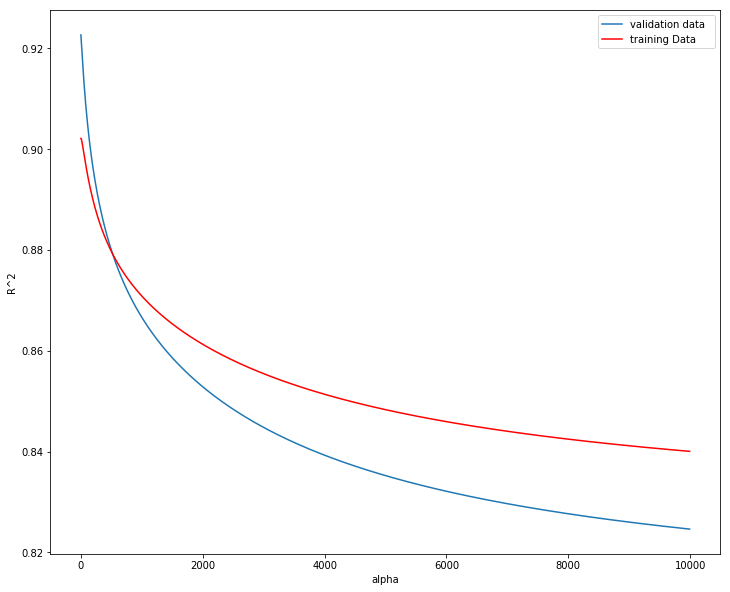

In [41]:
#plot for different alfa
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The blue line represents the R^2 of the test data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha. The red line in represents the  R^2 of the test data, as Alpha increases the R^2 decreases; therefore as Alpha increases the model performs worse on the test data.  The blue line represents the R^2 on the validation data, as the value for Alpha increases the R^2 decreases.   

Lower alpha value (lower polynomial degree) will yield better R^2. Let's find the exact alpha value and then determine the model.

In [42]:
x_data = lrdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y_data= lrdf[['CO2EMISSIONS']]
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

In [43]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [44]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(train_x, train_y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 1, 3)

In [45]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [46]:
#obtian the best alpha by cross-vaildation
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(train_x, train_y)
ridgecv.alpha_

0.01155064850041579

Therefore, we see that the value of alpha that results in the smallest cross-validation error is 0.012.It suggests that linear regression model fits better.

In [47]:
#obtain the RMSE
ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(train_x, train_y)
mean_squared_error(test_y, ridge.predict(test_x))

593.7935827354731

In [57]:
#Use the optimized alpha for the new ridge regression model using all data
ridge_final = Ridge(alpha=0.012) 
ridge_final.fit(x_data, y_data)
ridge_final.coef_

array([[10.85494779,  7.51636562,  9.5956638 ]])

In [49]:
ridge_final.intercept_

array([65.22307574])

Therefore, the ridge regression model is: CO2EMISSION=65.22+10.85 * ENGINESIZE+7.52 * CYLINDERS+ 9.60 * FUELCONSUMPTION_COMB + Error

## Model Selection

So far we know linear regression is better than polynomial regression. Now we compare linear regression with ridge regression by MSE. The MSE obtained from the linear regression model is 622.53, however MSE from Ridge Regression is much better: 593.79. So in this case, we use the Ridge Regression model.